# Zadanie 1. Segmentacja obrazu za pomocą algorytmu k-średnich.

Proszę o wczytanie zdjęcia (palm_tree.jpg, źródło: https://www.pexels.com/photo/silhouette-
of-palm-trees-near-shoreline-461940/) i wykonanie następujących działań:

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [3]:
image_path = "palm_tree.jpg"
image = Image.open(image_path)

1.1. Wyświetlenie kodów RGB dla każdego piksela.

In [6]:
rgb_array = np.array(image)
rgb_values = rgb_array.reshape(-1, 3)
print(rgb_values)

[[ 28  35  63]
 [ 35  50  83]
 [ 98 118 153]
 ...
 [ 59  43  43]
 [ 51  37  36]
 [ 46  32  31]]


1.2. Wyświetlenie oryginalnego zdjęcia.

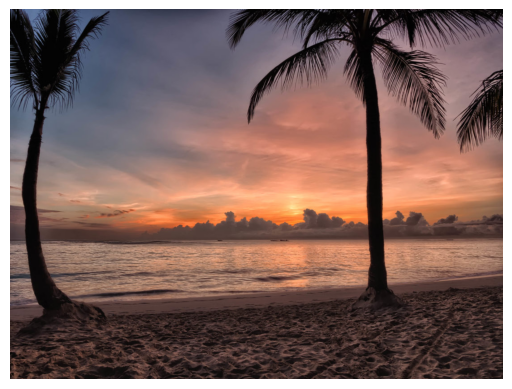

In [10]:
plt.imshow(image)
plt.axis('off')
plt.show()

1.3. Wykonanie kwantyzacji kolorów za pomocą algorytmu k-średnich.

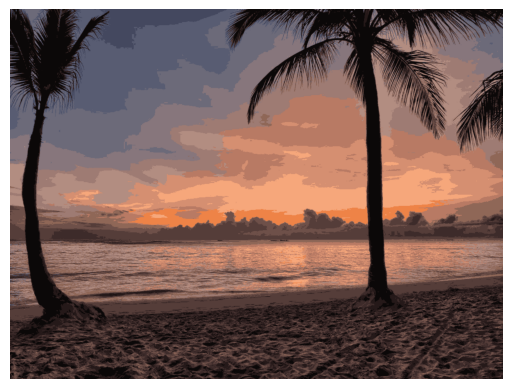

In [12]:
k = 16
rgb_values = rgb_array.reshape(-1, 3)
kmeans = KMeans(n_clusters=k, random_state=0).fit(rgb_values)
quantized_colors = kmeans.cluster_centers_.astype(int)
quantized_image = quantized_colors[kmeans.labels_].reshape(rgb_array.shape)
plt.imshow(quantized_image)
plt.axis('off')
plt.show()

1.4. Wyświetlenie rozmiarów zdjęcia i liczbę kanałów kolorów (RGB).

In [13]:
width, height = image.size
channels = rgb_array.shape[2]
print("Rozmiar zdjęcia:", width, "x", height)
print("Liczba kanałów kolorów:", channels)

Rozmiar zdjęcia: 1100 x 825
Liczba kanałów kolorów: 3


1.5. Przekształcenie danych z formatu 3D (w, h, c) do 2D (w * h, c).

In [14]:
rgb_2d = rgb_array.reshape(-1, 3)
print("Rozmiar danych po przekształceniu:", rgb_2d.shape)

Rozmiar danych po przekształceniu: (907500, 3)


1.6. Zastosowanie algorytm k-średnich dla 6 klastrów.

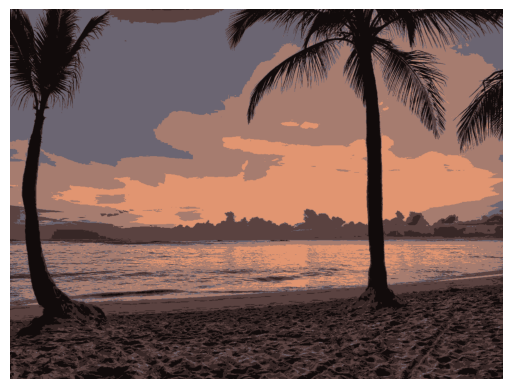

In [15]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=0).fit(rgb_2d)
quantized_colors_6 = kmeans.cluster_centers_.astype(int)
quantized_image_6 = quantized_colors_6[kmeans.labels_].reshape(rgb_array.shape)
plt.imshow(quantized_image_6)
plt.axis('off')
plt.show()


1.7. Wyświetlenie etykiet klastrów dla każdego piksela.

In [16]:
cluster_labels = kmeans.labels_.reshape(rgb_array.shape[:2])
print(cluster_labels)

[[3 3 5 ... 2 2 2]
 [3 3 5 ... 2 2 2]
 [3 3 5 ... 2 2 2]
 ...
 [3 3 3 ... 2 2 2]
 [2 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


1.8. Wyświetlenie współrzędne centroidów.

In [17]:
centroids = kmeans.cluster_centers_
print("Współrzędne centroidów:", centroids)

Współrzędne centroidów: [[225.3442035  149.80133774 113.13886839]
 [ 90.73888512  66.89564784  64.21946204]
 [ 17.05307179  11.68495306  11.53865426]
 [ 55.6501672   39.30592305  38.17739171]
 [166.5614699  124.16975639 111.78680013]
 [107.21909895 101.38317482 114.483146  ]]


1.9. Zaokrąglenie współrzędnych centroidów (kolory) do 0 miejsc po przecinku.

In [18]:
rounded_centroids = np.round(centroids).astype(int)
print("Zaokrąglone współrzędne centroidów:", rounded_centroids)

Zaokrąglone współrzędne centroidów: [[225 150 113]
 [ 91  67  64]
 [ 17  12  12]
 [ 56  39  38]
 [167 124 112]
 [107 101 114]]


1.10. Utworzenie skwantyzowanego obrazu, zamieniając każdy piksel na odpowiadający mu
kolor centroidu.

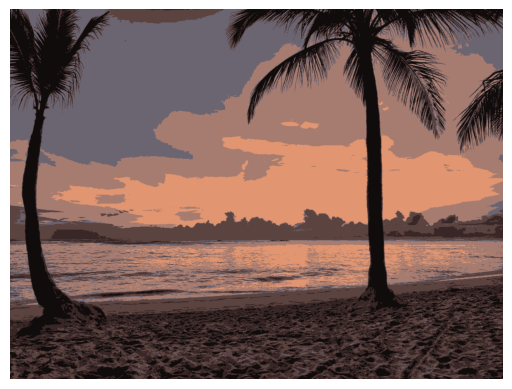

In [19]:
quantized_image_final = rounded_centroids[kmeans.labels_].reshape(rgb_array.shape)
plt.imshow(quantized_image_final)
plt.axis('off')
plt.show()

1.11. Wyświetlenie obrazu po kwantyzacji.

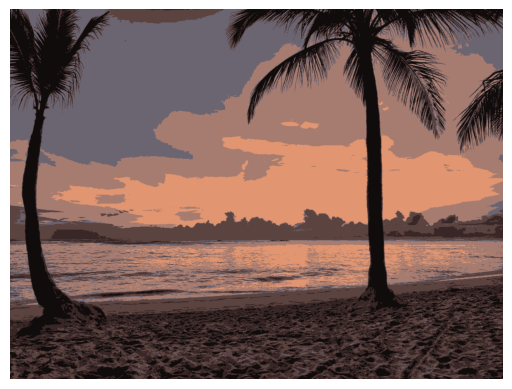

In [20]:
plt.imshow(quantized_image_final)
plt.axis('off')
plt.show()

# Zadanie 2. Korzystając ze zbioru danych iris.csv, proszę o wykonanie następujących czynności:

2.1. Wczytanie danych.

In [26]:
df = pd.read_csv("iris.csv")

2.2. Sprawdzenie kompletności danych.

In [27]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


2.3. Sprawdzenie statystyk podstawowych, informacji nt. danych.

In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


2.4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka. Na jaką ilość
skupień można podzielić zbiór danych?

<ipython-input-34-ab964031a313>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='petal_length', y='petal_width', palette='Set1')


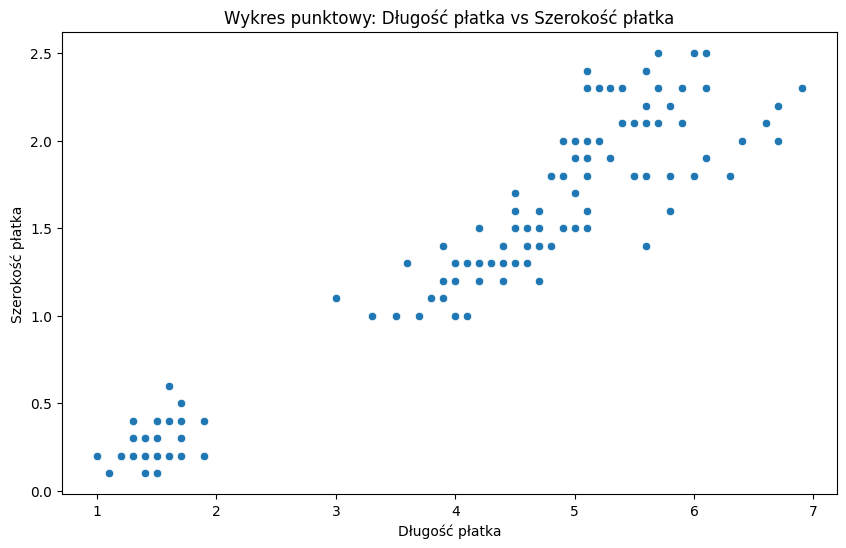

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Wykres punktowy: Długość płatka vs Szerokość płatka')
plt.show()

2.5. Wykres punktowy zależności długości płatka w funkcji szerokości płatka, dane
różnicowane za pomocą gatunku/rodzaju.

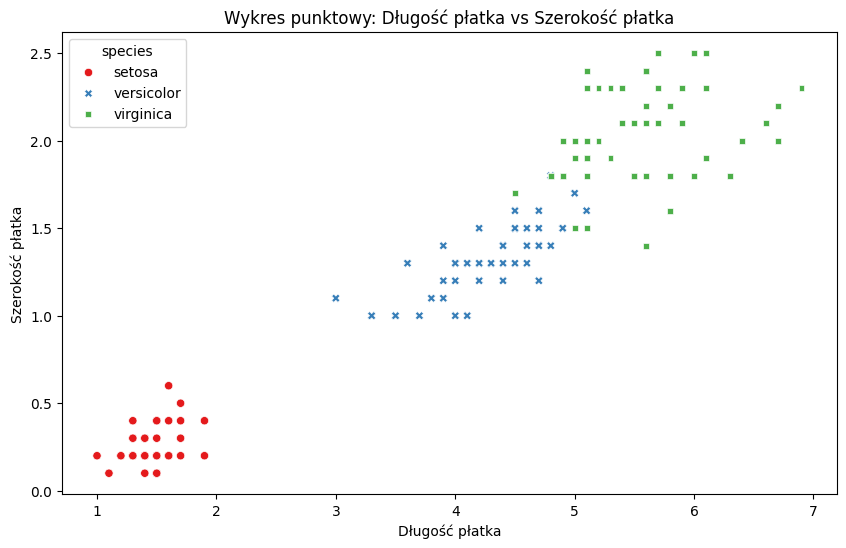

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', style='species', palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Wykres punktowy: Długość płatka vs Szerokość płatka')
plt.show()

2.6. Przygotowanie nowego obiektu df_iris, w której zostanie usunięta kolumna 'species'.

In [35]:
df_iris = df.drop(columns=['species'])

2.7. Przygotowanie nowego obiekt df_iris_std (z punktu 2.6), gdzie dane wejściowe będą
zestandaryzowane.

In [37]:
scaler = StandardScaler()
df_iris_std = scaler.fit_transform(df_iris)

2.8. Przygotowanie nowego obiekt df_iris_norm (z punktu 2.6), gdzie dane wejściowe będą
znormalizowane w zakresie [0,1].

In [39]:
minmax_scaler = MinMaxScaler()
df_iris_norm = minmax_scaler.fit_transform(df_iris)

##2.9. Przygotowanie 3 heatmap. Jakich informacji nt. zbioru danych dotyczących irysów
##dostarczają mapy korelacji:

a. dane wejściowe (punkt 2.6),

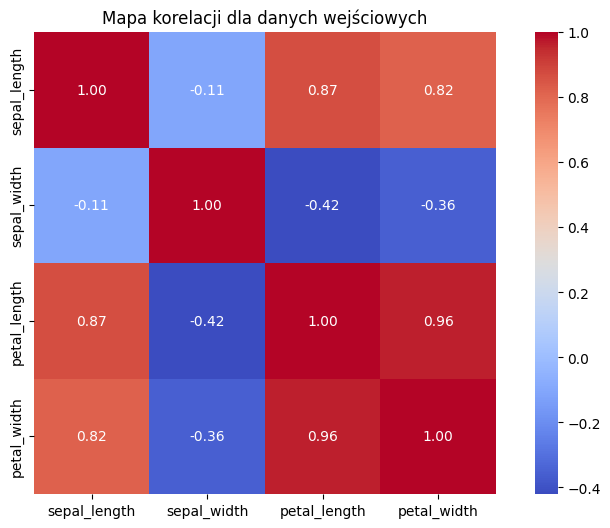

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_iris.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Mapa korelacji dla danych wejściowych')
plt.show()

b. dane zestandaryzowane (punkt 2.7),

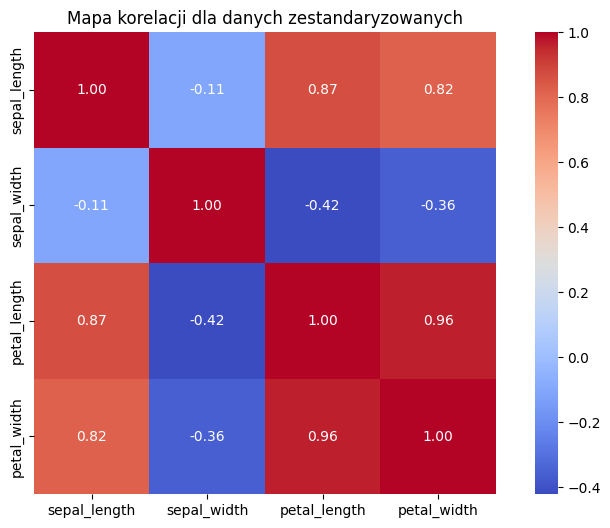

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(df_iris_std, columns=df_iris.columns).corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Mapa korelacji dla danych zestandaryzowanych')
plt.show()

c. dane znormalizowane (punkt 2.8).

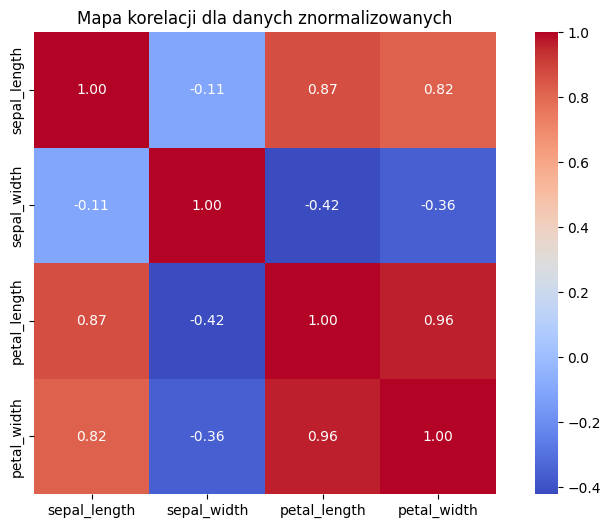

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(df_iris_norm, columns=df_iris.columns).corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Mapa korelacji dla danych znormalizowanych')
plt.show()


##2.10. Dla danych oryginalnych:

###2.10.1. Zastosować algorytm hierarchiczny metody aglomeracyjnej dla odpowiedniej liczby
grup (patrz: 2.4., 2.5.), dla 3 metod łączenia:

a. Warda,

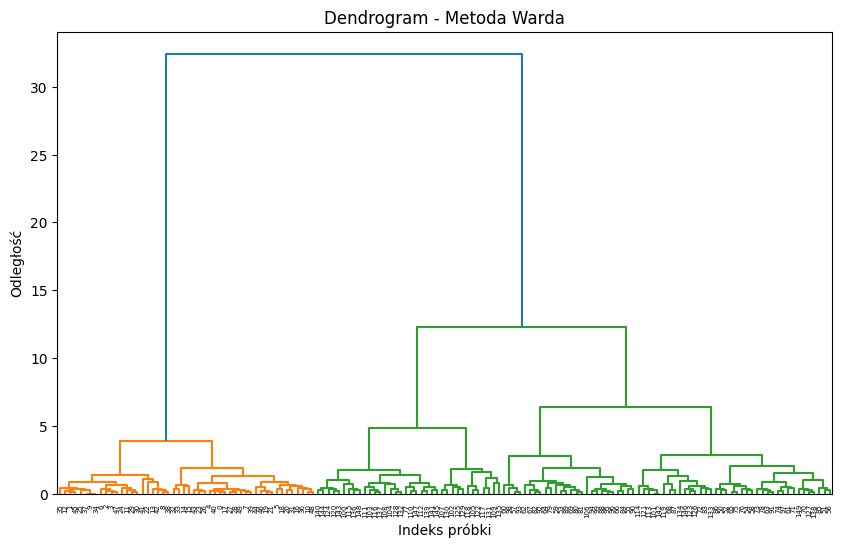

In [44]:
Z_ward = linkage(df_iris, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z_ward)
plt.title('Dendrogram - Metoda Warda')
plt.xlabel('Indeks próbki')
plt.ylabel('Odległość')
plt.show()

b. pojedynczego połączenia,

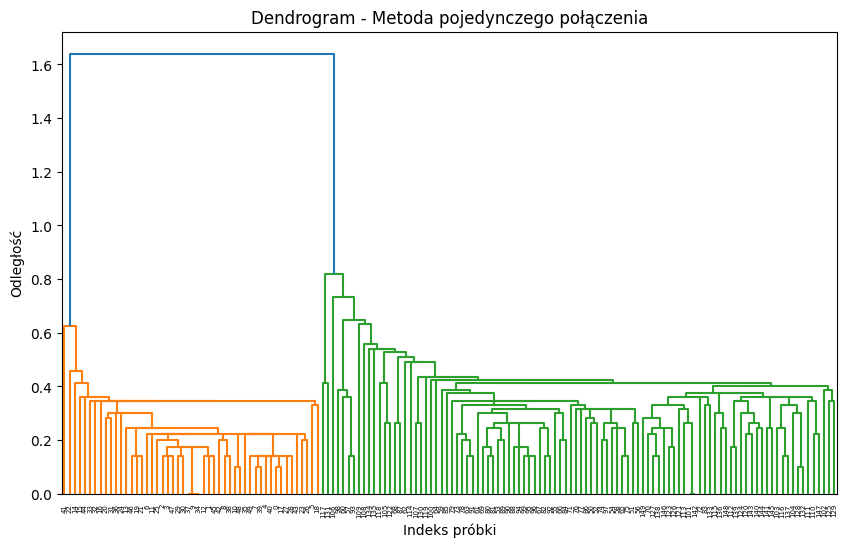

In [45]:
Z_single = linkage(df_iris, method='single')
plt.figure(figsize=(10, 6))
dendrogram(Z_single)
plt.title('Dendrogram - Metoda pojedynczego połączenia')
plt.xlabel('Indeks próbki')
plt.ylabel('Odległość')
plt.show()


c. całkowitego połączenia.

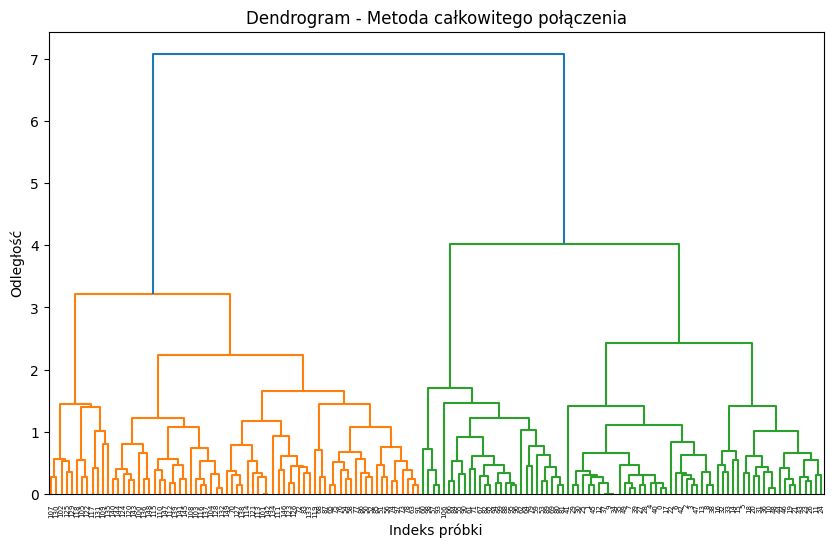

In [46]:
Z_complete = linkage(df_iris, method='complete')
plt.figure(figsize=(10, 6))
dendrogram(Z_complete)
plt.title('Dendrogram - Metoda całkowitego połączenia')
plt.xlabel('Indeks próbki')
plt.ylabel('Odległość')
plt.show()

2.10.2. Zastosowanie algorytmu k-średnich dla odpowiedniej liczby grup (patrz: 2.4., 2.5.).

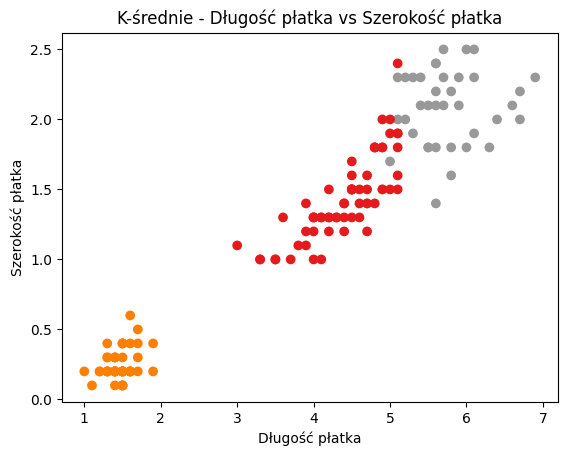

In [47]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df_iris)

plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=kmeans.labels_, cmap='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('K-średnie - Długość płatka vs Szerokość płatka')
plt.show()


2.10.3. Jaki jest wynik profilu dla poszczególnych rozwiązań uzyskanych metodą
aglomeracyjną, a jaki jest wynik profilu dla rozwiązań metodą k-średnich?

Wyniki profilu dla poszczególnych rozwiązań uzyskanych metodą aglomeracyjną i metodą k-średnich można porównać na podstawie wykresów i przypisania do klastrów.

Metoda aglomeracyjna (Ward, pojedyncze i całkowite połączenie):

Ward: Tworzy najbardziej zwięzłe klastry, minimalizując wewnętrzną wariancję. Klastery będą bardziej zrównoważone, a różnice między nimi wyraźniejsze.
Pojedyncze połączenie: Klastery mogą być dłuższe i rozciągnięte, co prowadzi do większej elastyczności. Może prowadzić do łączenia różnych klas, co może utrudniać interpretację wyników.
Całkowite połączenie: Tworzy zwarte i zwarte klastry, ale może być bardziej wrażliwe na outliery. Często skutkuje to bardziej zróżnicowanymi klastrami.
Metoda k-średnich:

Metoda k-średnich przypisuje punkty do klastrów na podstawie ich odległości od centroidów. Daje to wyraźnie zdefiniowane grupy, które są oparte na minimalizacji odległości między punktami a centroidami. Klastry są bardziej kompaktowe i mają podobne rozmiary, co czyni je łatwiejszymi do interpretacji.
Porównanie:

Kluczową różnicą jest to, że metoda aglomeracyjna może generować klastry o różnych kształtach i rozmiarach, podczas gdy k-średnie dąży do tworzenia bardziej jednorodnych klastrów o podobnych wielkościach. W praktyce, wyniki obu metod mogą różnić się w zależności od rozkładu danych, a wybór metody może być uzależniony od specyfiki problemu i preferencji analityka.

2.10.4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka:

dane różnicowane za pomocą etykiet nadanych za pomocą algorytmu hierarchicznego
dla każdej metody łączenia.

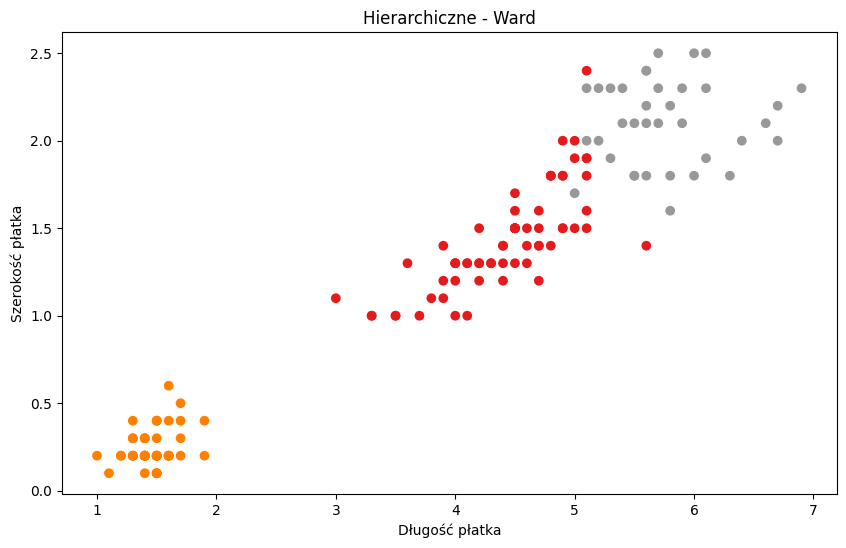

In [49]:
ward_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward = ward_cluster.fit_predict(df_iris)

plt.figure(figsize=(10, 6))
plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=labels_ward, cmap='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Hierarchiczne - Ward')
plt.show()

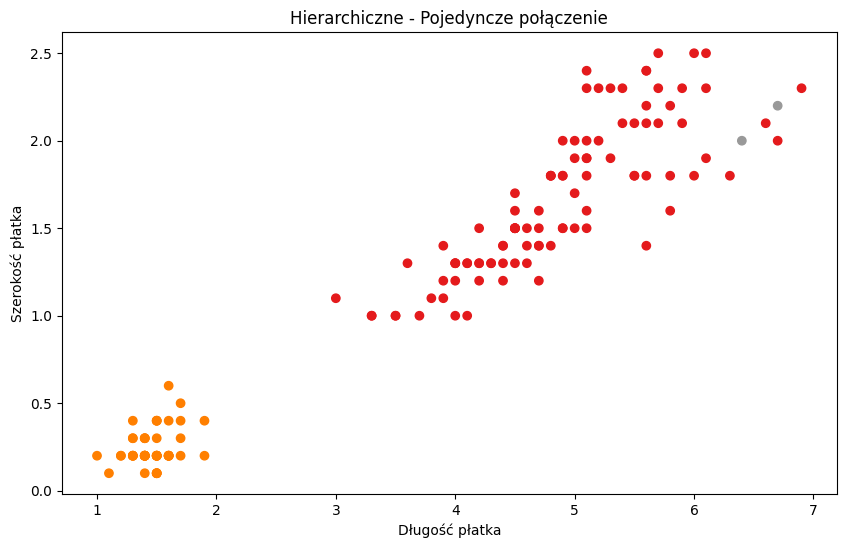

In [50]:
single_cluster = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = single_cluster.fit_predict(df_iris)

plt.figure(figsize=(10, 6))
plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=labels_single, cmap='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Hierarchiczne - Pojedyncze połączenie')
plt.show()

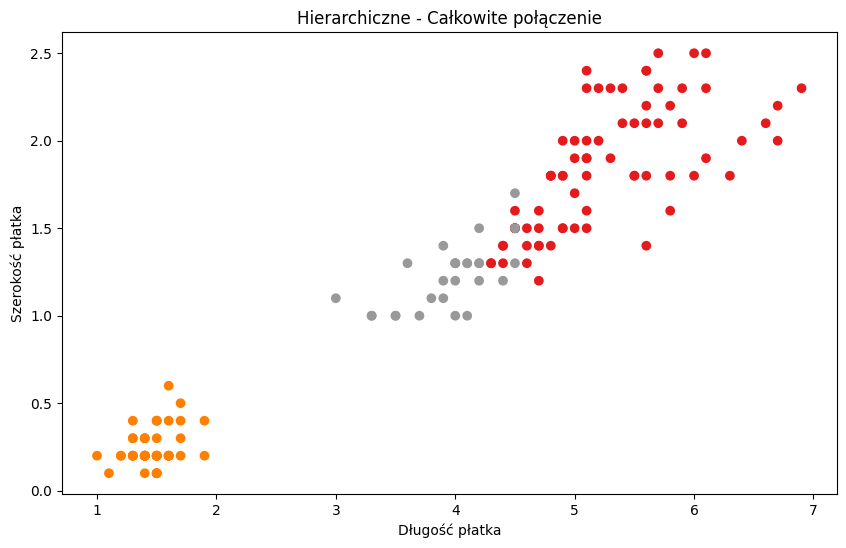

In [51]:
# Całkowite połączenie
complete_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = complete_cluster.fit_predict(df_iris)

plt.figure(figsize=(10, 6))
plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=labels_complete, cmap='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Hierarchiczne - Całkowite połączenie')
plt.show()

dane różnicowane za pomocą etykiet nadanych za pomocą algorytmu k-średnich.

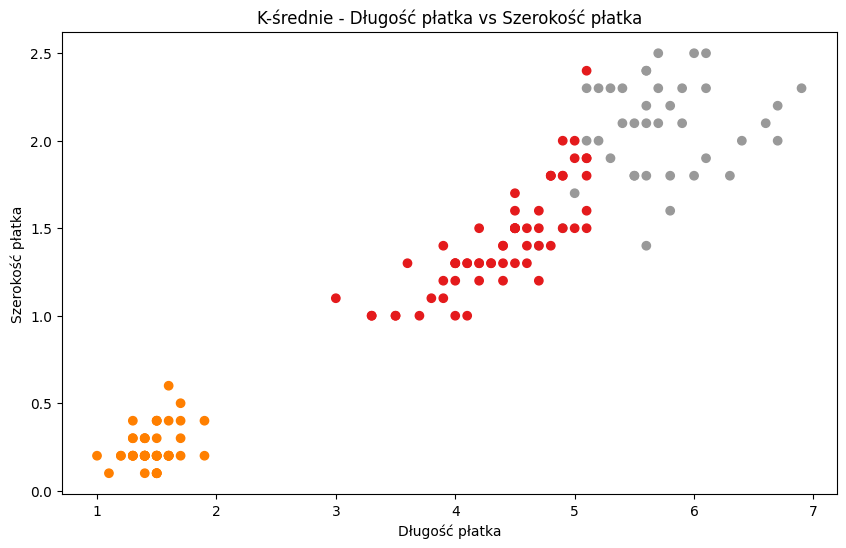

In [59]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_iris)
labels_kmeans = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df_iris['petal_length'], df_iris['petal_width'], c=labels_kmeans, cmap='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('K-średnie - Długość płatka vs Szerokość płatka')
plt.show()


2.10.5. Czy uzyskane skupienia metodą hierarchiczną i k-średnich są podobne do danych z 2.5.?

##2.11. Dla danych zestandaryzowanych przeprowadzić klasteryzację jak w 2.10.1-2.10.5.

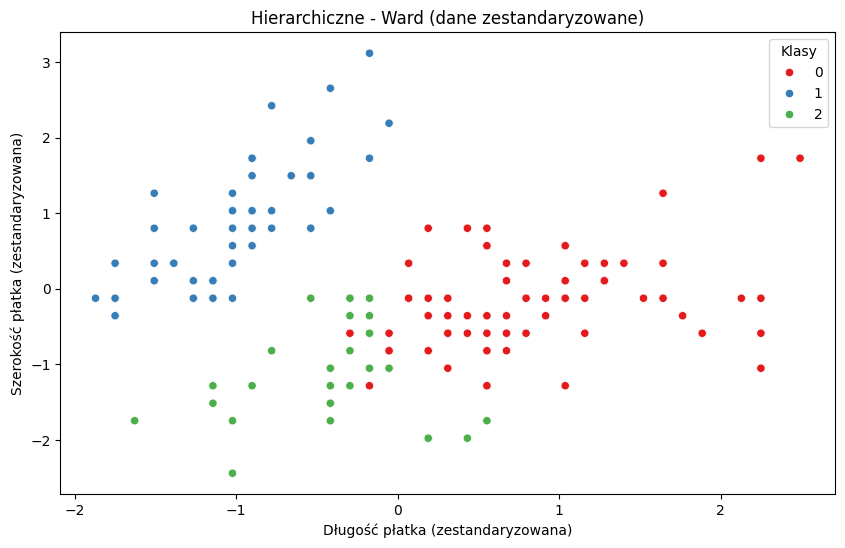

In [55]:
ward_cluster_std = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward_std = ward_cluster_std.fit_predict(df_iris_std)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_std[:, 0], y=df_iris_std[:, 1], hue=labels_ward_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('Hierarchiczne - Ward (dane zestandaryzowane)')
plt.legend(title='Klasy', loc='best')
plt.show()

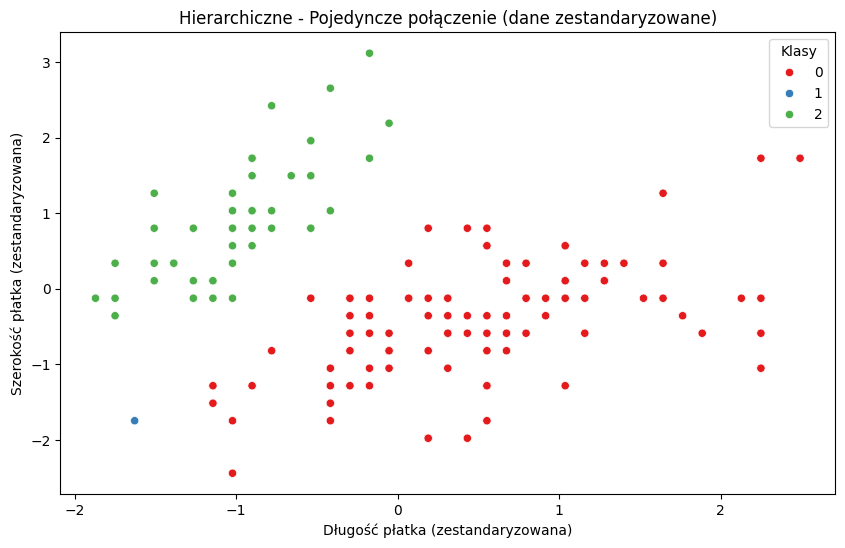

In [56]:
single_cluster_std = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single_std = single_cluster_std.fit_predict(df_iris_std)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_std[:, 0], y=df_iris_std[:, 1], hue=labels_single_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('Hierarchiczne - Pojedyncze połączenie (dane zestandaryzowane)')
plt.legend(title='Klasy', loc='best')
plt.show()


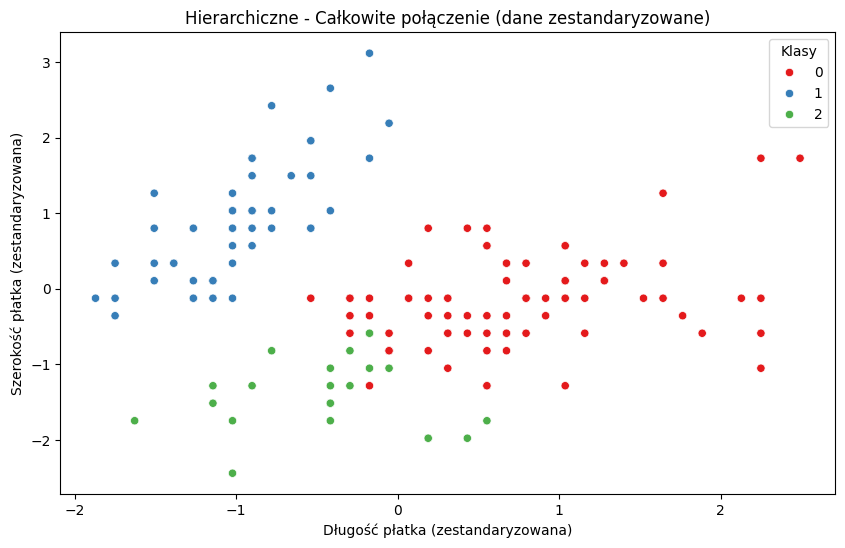

In [57]:
complete_cluster_std = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete_std = complete_cluster_std.fit_predict(df_iris_std)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_std[:, 0], y=df_iris_std[:, 1], hue=labels_complete_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('Hierarchiczne - Całkowite połączenie (dane zestandaryzowane)')
plt.legend(title='Klasy', loc='best')
plt.show()


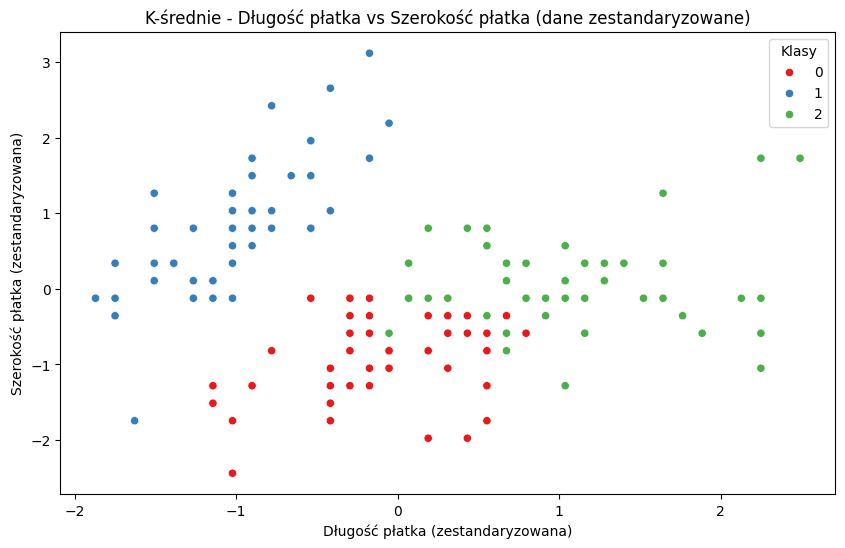

In [58]:
kmeans_std = KMeans(n_clusters=3, random_state=0)
kmeans_std.fit(df_iris_std)
labels_kmeans_std = kmeans_std.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_std[:, 0], y=df_iris_std[:, 1], hue=labels_kmeans_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('K-średnie - Długość płatka vs Szerokość płatka (dane zestandaryzowane)')
plt.legend(title='Klasy', loc='best')
plt.show()


##2.12. Dla danych znormalizowanych przeprowadzić klasteryzację jak w 2.10.1-2.10.5.

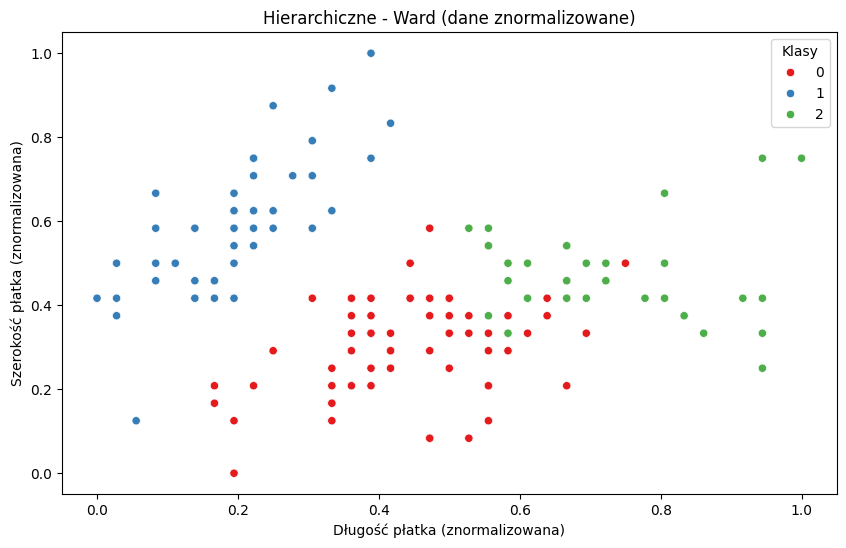

In [60]:
ward_cluster_norm = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward_norm = ward_cluster_norm.fit_predict(df_iris_norm)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_norm[:, 0], y=df_iris_norm[:, 1], hue=labels_ward_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('Hierarchiczne - Ward (dane znormalizowane)')
plt.legend(title='Klasy', loc='best')
plt.show()


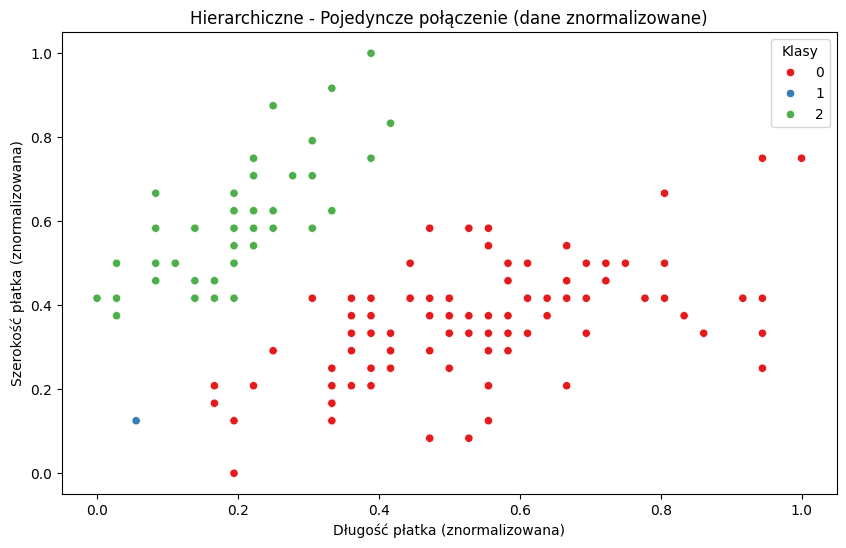

In [61]:
single_cluster_norm = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single_norm = single_cluster_norm.fit_predict(df_iris_norm)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_norm[:, 0], y=df_iris_norm[:, 1], hue=labels_single_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('Hierarchiczne - Pojedyncze połączenie (dane znormalizowane)')
plt.legend(title='Klasy', loc='best')
plt.show()


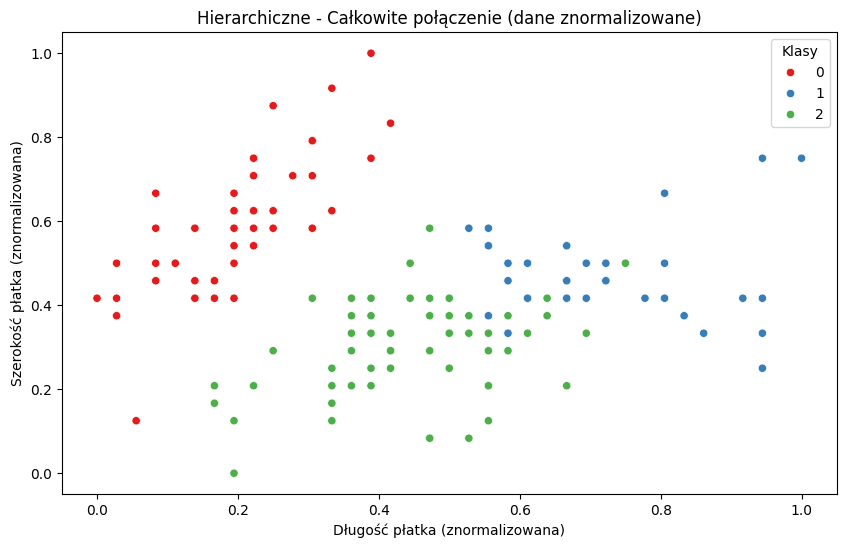

In [62]:
complete_cluster_norm = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete_norm = complete_cluster_norm.fit_predict(df_iris_norm)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_norm[:, 0], y=df_iris_norm[:, 1], hue=labels_complete_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('Hierarchiczne - Całkowite połączenie (dane znormalizowane)')
plt.legend(title='Klasy', loc='best')
plt.show()


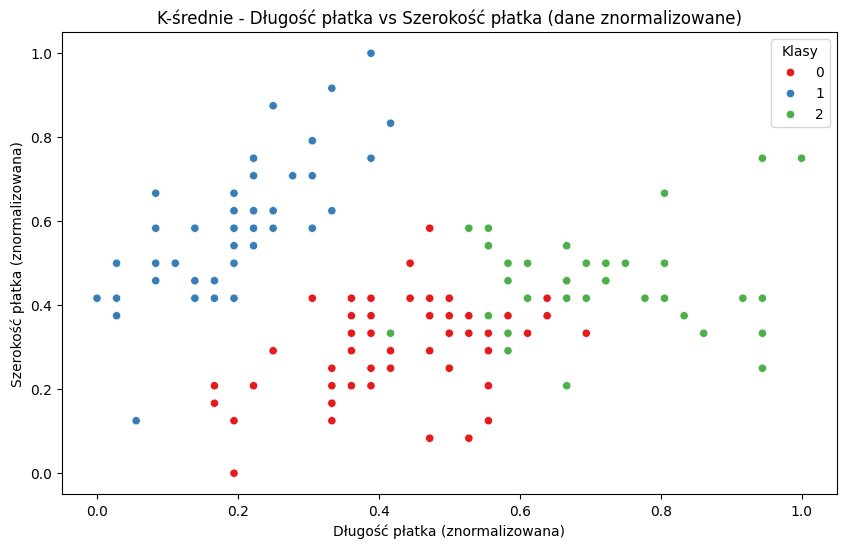

In [63]:
kmeans_norm = KMeans(n_clusters=3, random_state=0)
kmeans_norm.fit(df_iris_norm)
labels_kmeans_norm = kmeans_norm.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_iris_norm[:, 0], y=df_iris_norm[:, 1], hue=labels_kmeans_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('K-średnie - Długość płatka vs Szerokość płatka (dane znormalizowane)')
plt.legend(title='Klasy', loc='best')
plt.show()
